In [1]:
from utils import *
from fastai2.vision.widgets import *
import torch 

####  fastai dataloader using compressed images of size 256x256 

In [33]:
def label_func3(file_path):
    """ input : file_path (path:object)
                ( e.g. /home/abharani/data/train_images/6fc63d2394ebade5d7e09856eab1f726_0.jpg)
        returns : 1 , 2, 3 (int)
    """ 
    image_name = str(file_path).split("/")[-1]
    
    return int(image_name.replace(".jpg", "").split("_")[-2])


In [34]:
biopsy_images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [35]:
path = Path('/home/abharani/cs231n_project/glued_images/data')
dls = biopsy_images.dataloaders(path)


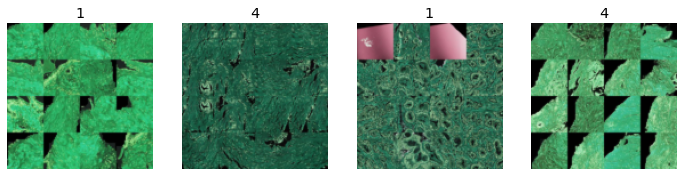

In [36]:
dls.valid.show_batch(max_n=4, nrows=1)


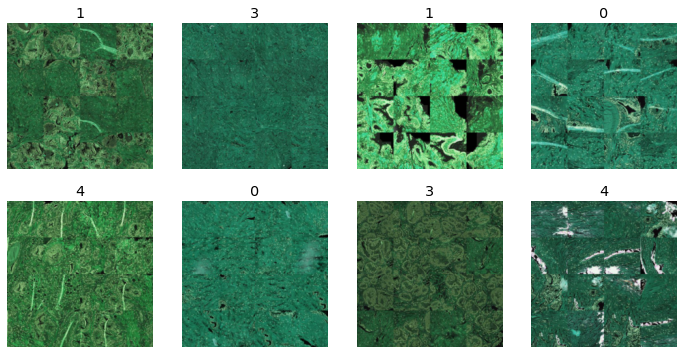

In [37]:
biopsy_images = biopsy_images.new(item_tfms=Resize(224, ResizeMethod.Squish,aug_transforms(mult=2)))
dls = biopsy_images.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2)

In [8]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,time
0,2.286341,1.705179,0.353274,02:57


epoch,train_loss,valid_loss,accuracy,time
0,1.646247,1.490815,0.414508,03:57
1,1.371522,1.601166,0.403203,03:57
2,1.162228,1.657490,0.422044,03:57
3,0.958681,1.966135,0.374941,03:58
4,0.764100,2.049006,0.420631,03:59
5,0.553221,2.310414,0.401319,03:58
6,0.404184,2.308301,0.421102,03:58
7,0.302587,2.507164,0.437117,03:58
8,0.219099,2.509679,0.447480,03:58
9,0.202895,3.029673,0.403674,03:58


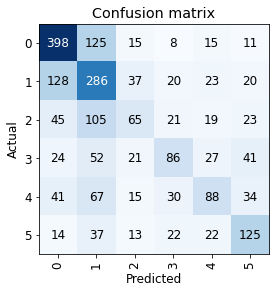

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

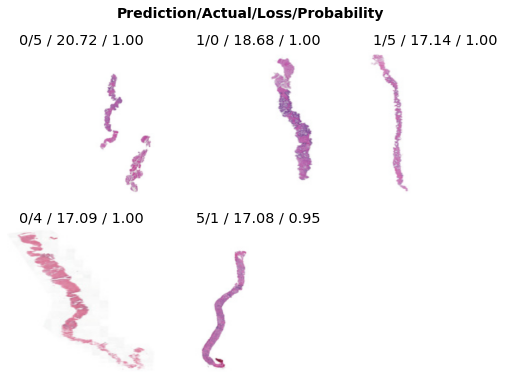

In [11]:
interp.plot_top_losses(5)

In [19]:
learn.unfreeze()

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=9.12010818865383e-07)

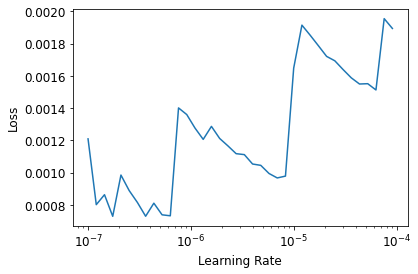

In [20]:
learn.lr_find()
# print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [21]:
learn.fit_one_cycle(6, lr_max=6.309573450380412e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.001304,2.815706,0.492699,03:59
1,0.002566,2.878005,0.490815,03:59
2,0.001996,2.872787,0.487989,03:58
3,0.001478,2.863424,0.492228,03:57
4,0.001652,2.888797,0.493170,03:58
5,0.002248,2.841652,0.491286,03:59


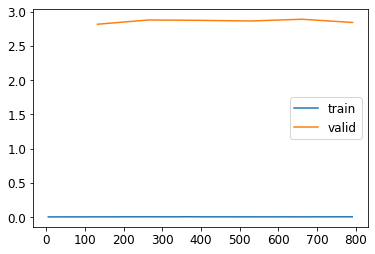

In [22]:
learn.recorder.plot_loss()

In [23]:
interp.most_confused(min_val=50)

[('1', '0', 128),
 ('0', '1', 125),
 ('2', '1', 105),
 ('4', '1', 67),
 ('3', '1', 52)]

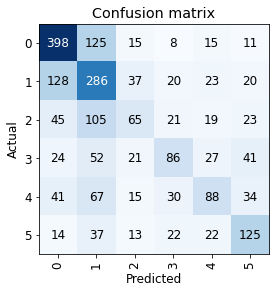

In [26]:
interp.plot_confusion_matrix()